In [2]:
# Dependencies
import pandas as pd
import numpy as np
import csv
import os
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file_crime = "resources/clean_crime_data_with_rates.csv"
file_income = "resources/clean_income_file.csv"

In [4]:
df_crime = pd.read_csv(file_crime)

df_crime.head()


,ZipCode,City,nb of crimes,Number of returns,crime per tax payer
0,85003,Phoenix,2203.0,3900.0,0.564872
1,85004,Phoenix,2310.0,2960.0,0.780405
2,85006,Phoenix,3769.0,9680.0,0.389360
3,85007,Phoenix,3002.0,5300.0,0.566415
4,85008,Phoenix,8935.0,23140.0,0.386128


In [35]:
df_income = pd.read_csv(file_income)
df_income = df_income.rename(columns={"Zip Code":"ZipCode"})
df_income.head()


,ZipCode,City,Number of returns,Amount,Average Income
0,85003,Phoenix,"3,900","290,006",74360.51
1,85004,Phoenix,"2,960","232,765",78636.82
2,85006,Phoenix,"9,680","352,359",36400.72
3,85007,Phoenix,"5,300","278,695",52583.96
4,85008,Phoenix,"23,140","797,391",34459.42


In [37]:
## Property value df
df_pv = pd.read_csv("resources/clean_pv_2018.csv")
df_pv = df_pv.dropna()
df_pv.head()

,ZipCode,City_x,Date,County,City_y,Zhvi
0,85003,Phoenix,2018-08-31,Maricopa,Phoenix,395100.0
1,85004,Phoenix,2018-08-31,Maricopa,Phoenix,262600.0
4,85008,Phoenix,2018-08-31,Maricopa,Phoenix,206400.0
6,85012,Phoenix,2018-08-31,Maricopa,Phoenix,467900.0
7,85013,Phoenix,2018-08-31,Maricopa,Phoenix,305100.0


In [39]:
# merge the data frame

df_global = pd.merge(df_income, df_crime, on="ZipCode", how="inner")
df_global = pd.merge(df_global, df_pv, on="ZipCode", how ="inner")

df_global.head()


,ZipCode,City_x_x,Number of returns_x,Amount,Average Income,City_y_x,nb of crimes,Number of returns_y,crime per tax payer,City_x_y,Date,County,City_y_y,Zhvi
0,85003,Phoenix,"3,900","290,006",74360.51,Phoenix,2203.0,3900.0,0.564872,Phoenix,2018-08-31,Maricopa,Phoenix,395100.0
1,85004,Phoenix,"2,960","232,765",78636.82,Phoenix,2310.0,2960.0,0.780405,Phoenix,2018-08-31,Maricopa,Phoenix,262600.0
2,85008,Phoenix,"23,140","797,391",34459.42,Phoenix,8935.0,23140.0,0.386128,Phoenix,2018-08-31,Maricopa,Phoenix,206400.0
3,85012,Phoenix,"3,800","407,578",107257.37,Phoenix,1202.0,3800.0,0.316316,Phoenix,2018-08-31,Maricopa,Phoenix,467900.0
4,85013,Phoenix,"9,800","707,257",72169.08,Phoenix,4061.0,9800.0,0.414388,Phoenix,2018-08-31,Maricopa,Phoenix,305100.0


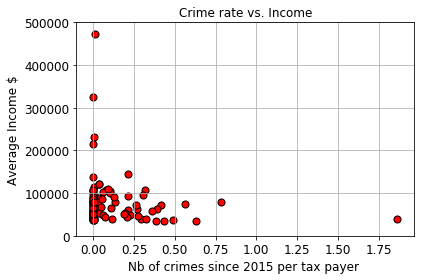

In [40]:
# Ploting Crime rate vs Income
plt.figure()
# plt.

plt.scatter(df_global['crime per tax payer'], df_global['Average Income'],  s=50, c="red", edgecolors='k')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel("Nb of crimes since 2015 per tax payer ",fontsize=12)
plt.ylabel("Average Income $", fontsize=12)
plt.ylim(0,500000)
plt.title("Crime rate vs. Income", fontsize=12)
plt.grid()
plt.tight_layout()
plt.savefig("plots/scatter_crime_vs_income.png")
plt.show()

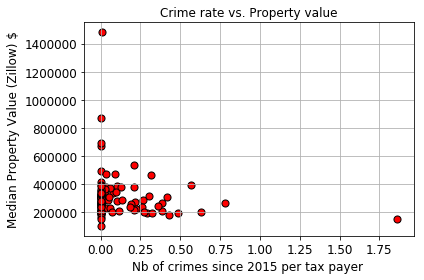

In [42]:
# Ploting Crime rate vs PV
plt.figure()
# plt.

plt.scatter(df_global['crime per tax payer'], df_global['Zhvi'],  s=50, c="red", edgecolors='k')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel("Nb of crimes since 2015 per tax payer ",fontsize=12)
plt.ylabel("Median Property Value (Zillow) $", fontsize=12)
# plt.ylim(0,500000)
plt.title("Crime rate vs. Property value", fontsize=12)
plt.grid()
plt.tight_layout()
plt.savefig("plots/scatter_crime_vs_pv.png")
plt.show()
